# TRABAJO PRÁCTICO FINAL - VIOLENCIA DE GÉNERO EN LA ARGENTINA

## Sección 1 - Presentación del problema específico

### Contexto empresarial
A lo largo de los años, la situación vulnerable de la mujer en Argentina se está haciendo visible. Por lo que, exponer la cantidad de casos y sus efectos a toda la sociedad, contribuye a la visibilizacion de las mujeres que han sufrido y las que continuarán sufirendo a causa de la desigualdad de género. Además, permitiran avanzar pasos transcendentales en materia de políticas públicas en favor de la igualdad y contra las violencias de género. Generando acciones de corto, mediano y largo plazo sustentadas para la prevención, asistencia integral y protección de aquellas mujeres que atraviesan estas situaciones de violencia. Haciendo hincapie en aquellas. Por lo que, es muy importante analizar que edades son la que mayor cantidad de casos hay y en que provincias. La informacion obtenida corresponde a aquellas comunicaciones recibidad por la Línea 144, en donde las personas que se comunican acceden a dejar sus datos para un adecuado abordaje y seguimiento. Los registros corresponden a tres sedes: Provincia de Buenos Aires, CABA y la sede de gestión nacional.

### Contexto analítico 
La informacion obtenida corresponde a dos fuentes:

- El archivo ¨ViolenciaGenero2.0.xlsx" que contiene el historial de los casos de violencia de género en la Argentina desde el 2020.Se obtuvieron de comunicaciones recibidas por la Línea 144, en donde las personas que se comunican acceden a dejar sus datos para un adecuado abordaje y seguimiento. Los registros corresponden a tres sedes: Provincia de Buenos Aires, CABA y la sede de gestión nacional.

## Sección 2 - Objetivos e hipótesis de la investigación
### Objetivos
En este caso, se busca realizar un análisis estadístico y su consecuente compresión de los valores con el fin de determinar las provincias y edades más afectadas. Además, se analizará los datos obtenidos de otros paises para comprender el contexto mundial sobre y hacia la violencia de género.

### Hipótesis
Las preguntas a responder son:

- Como fueron modificando la cantidad de casos de viuolencia de género en Argentina?
- En que provincias se producen más casos?
- Cuales son las edades en las que se produce más violencia?
- Cual es la relación con el agresor? Varía en función de la edad?
- Cuales son los motivos y tipos de violencia más comunoes en cada rango etario?
- Cuales son los paises con mayor cantidad de casos de violencia de género?
- Cuales son las edades más vulnerables?

## Sección 3 - Data Acquisition
### Importación de librerias

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np                    # Importar Numpy
import pandas as pd                   # Importar Pandas
import scipy as sp

# Gráficos
# ==============================================================================
import matplotlib as mpl              # Importar MatPlotLib
import matplotlib.pyplot as plt       # El modulo Pyplot de Matplotlib
import seaborn as sns                 # Importar Seaborn
import plotly.express as px

mpl.style.use('bmh')    # Establecemos un nuevo estilo

#import probscale
#import matplotlib.font_manager
#from matplotlib import style

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

#from sklearn.preprocessing import scale
from sklearn import preprocessing  # Import label encoder
from sklearn.model_selection import train_test_split #para separar en train y test
# Modelos de Clasificacion:
# KNN
from sklearn.neighbors import KNeighborsClassifier
# REGRESCIÓN LOGISTICA
from sklearn.linear_model import LogisticRegression
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
# ARBOL DEL DECISION
from sklearn.tree import DecisionTreeClassifier 
# XGBOOST
import xgboost as xgb

# Métricas
# ==============================================================================
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, roc_auc_score


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

### Dataset y limpieza de datos

In [2]:
#IMPORTAMOS BASE DE DATOS 1
bd=pd.read_excel(r'C:\Users\garro\OneDrive\Escritorio\DATA SCIENCE\TRABAJO PRACTICO\ViolenciaGenero2.3.xlsx', sheet_name='casos')

#CAMBIAMOS FORMATO DE LA COLUMNA FECHA A 'DATETIME'
bd['FECHA']=pd.to_datetime(bd.FECHA, errors='coerce')

#LIMPIEZA DE VALORES NULOS. REEMPLAZO POR MEDIA
bd['EDAD']= bd['EDAD'].fillna(method='bfill')

#REMOCION DE OUTLIERS
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df.loc[(df[column_name]>=lower_bound) & (df[column_name] <= upper_bound)]
    return df
bd = remove_outliers(bd, 'EDAD')
bd.head()

,FECHA,PROVINCIA,GENERO_PERSONA_SIT_VIOLENCIA,EDAD,PAIS_NACIMIENTO,VIOLENCIA_FISICA,VIOLENCIA_PSICOLOGICA,VIOLENCIA_SEXUAL,VIOLENCIA_ECONOMICA,VIOLENCIA_SIMBOLICA,...,VIOLENCIA_LABORAL,VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA,VIOLENCIA_OTRAS,VINCULO_PERSONA_AGRESORA,GENERO_AGRESOR,CASO,TiPO_VIOLENCIA,LUGAR_VIOLENCIA,MOTIVO_VIOLENCIA,TIPOVIOLENCIA
0,2020-01-01,Tucumán,Mujer,39.0,NaN,1,1,0,0,0,...,0,0,0,Pareja,Varon,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,1
1,2020-01-01,Buenos Aires,Mujer,39.0,NaN,1,1,0,0,0,...,0,0,0,Ex pareja,Varon,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,1
2,2020-01-01,Buenos Aires,Mujer,22.0,Argentina,1,1,0,0,0,...,0,0,0,Ex pareja,Varon,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,1
3,2020-01-01,Buenos Aires,Mujer,53.0,NaN,0,1,0,0,0,...,0,0,0,Pareja,Varon,1,VIOLENCIA_PSICOLOGICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,0
4,2020-01-01,Buenos Aires,Mujer,38.0,Argentina,1,1,0,0,0,...,0,0,0,Pareja,Varon,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,1


## Sección 4 - EDA (a partir de las preguntas iniciales)
### 4.1. COMO FUERON MODIFICANDO LA CANTIDAD DE CASOS DE VIOLENCIA DE GENERO EN ARGENTINA?
Lo primero que podemos analizar es como fueron modificando la cantidad de casos de violencia a lo largo de los años.

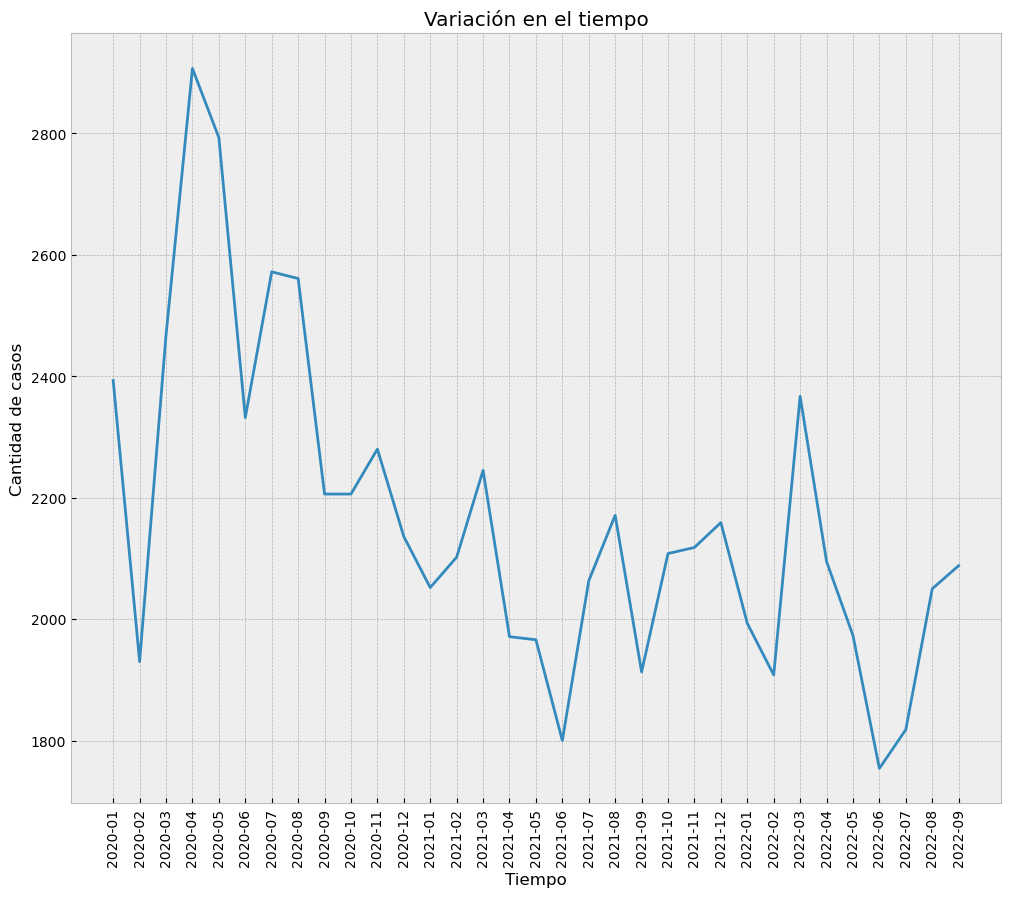

In [3]:
bd['FECHA'] = pd.to_datetime(bd['FECHA'], errors='coerce')
bd['FECHA_MES']=bd.FECHA.dt.to_period('M')
bd3=bd.groupby('FECHA_MES', as_index=False).sum()

bd3['FECHA_MES'] = bd3['FECHA_MES'].astype('str')

plt.figure(figsize=(12,10))
plt.plot(bd3.FECHA_MES, bd3.CASO)
plt.xticks(rotation = 'vertical')
plt.ylabel('Cantidad de casos')
plt.title('Variación en el tiempo')
plt.xlabel('Tiempo')
plt.show()

A grandes rasgos podemos visualizar que hay una leve tendendencia a que van disminuyendo. Pero, no podemos concluir mucho mas.

### 4.2. POR LO TANTO, PARA FACILITAR EL ANALISIS VISUAL, PODEMOSCOMPARAR LA CANTIDAD DE CASOS MES A MES, COMPARANDO DOS AÑOS DISTINTOS SIMULTANEAMENTE¶
Esto nos permitirá comparar visualmente dos años y buscar más fácilmente algun patrón.

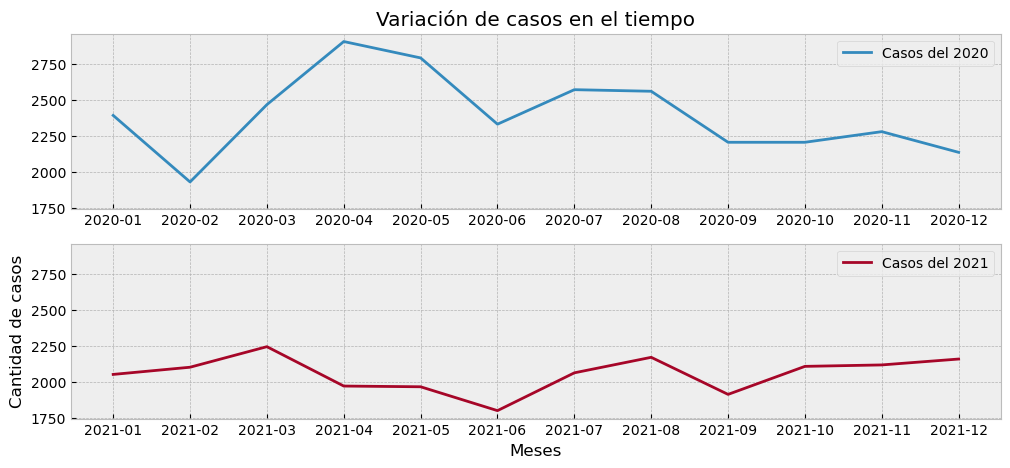

In [4]:
#PARA FACILITAR MAS EN ANALISI REALIZAMOS UNA GRILLA DE DOS GRAFICOS COMPARANDO EL AÑO 2020 Y 2021
#POR LO QUE CREAMOS DOS DATA FRAMES PARA CADA AÑO
df_2=bd.groupby('FECHA_MES', as_index=False).sum()
df_2.head()
df_2_2020= df_2.loc[0:11,['FECHA_MES','CASO']] 
df_2_2020['FECHA_MES'] = df_2_2020['FECHA_MES'].astype('str')

df_2_2021= df_2.loc[12:23,['FECHA_MES','CASO']] 
df_2_2021['FECHA_MES'] = df_2_2021['FECHA_MES'].astype('str')

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 5), sharey=True)  
ax[0].plot(df_2_2020.FECHA_MES, df_2_2020.CASO, label='Casos del 2020')
ax[1].plot(df_2_2021.FECHA_MES, df_2_2021.CASO, label='Casos del 2021', color='C1')
#ax[2].plot(df.FECHA[2022], df.CASO, label='Precipitaciones de marzo', color='C2')
ax[0].set_title('Variación de casos en el tiempo') 
ax[1].set_xlabel('Meses')  
ax[1].set_ylabel('Cantidad de casos')

ax[0].legend()  
ax[1].legend()
#ax[2].legend()  

A partir de estos dos gráficos podemos determinar que hubo un menor numero de casos en el 2021 que en el 2020.

### 4.3. ADEMÁS, PODEMOS ANALIZAR CUALES SON LOS MESES EN LOS QUE HUBO CASOS DE VIOLENCIA HASTA ENTONCES.

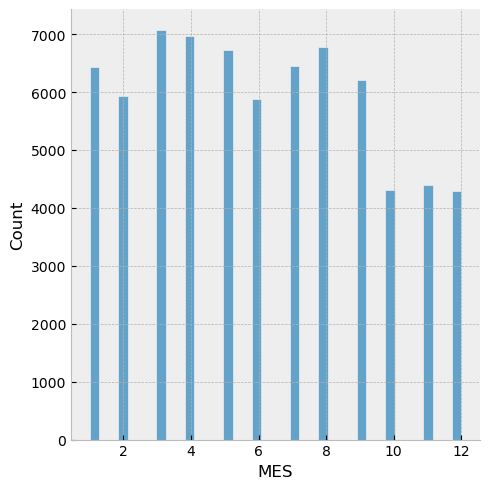

In [5]:
bd['MES'] = bd['FECHA'].dt.month
sns.displot(data=bd, x="MES",  multiple="stack")

Podemos observar que los meses en los que mas casos hubo son de Mayo a Agosto, mientras que los de menos son Noviembre y Diciembre. Esto puede deberse a que en los meses de invierno al estar más dentro del hogar puede aumentar la probabilidad de que ocurra un acto de violencia.

### 4.4. POR OTRO LADO PODEMOS ANALIZAR CUALES SON LAS PROVINCIAS EN DONDE SE PRODUCEN MAS CASOS Y CUALES SON LAS EDADES MAS VULNERABLES EN CADA UNA DE ELLAS¶

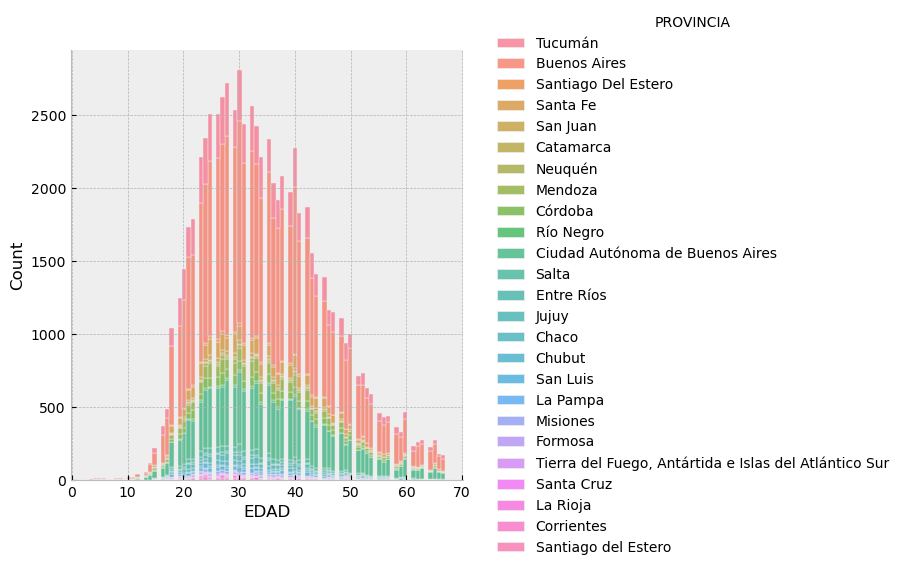

In [6]:
sns.displot(data=bd, x="EDAD", hue="PROVINCIA", multiple="stack")

Podemos visualizar que la mayor cantidad de casos se da en casos con victimas de un rango de edad de entre 27-43 años, siendo la edad en la que se concentra el 50% de los casos a los 34 años. Donde, las provincias con mayor cantidad de casos Buenos Aires y Tucumán, mientras que la de menor cantidad de casos La Rioja.

### 4.5. UN TERCER FACTOR A ANALIZAR ES COMO VARÍA LA RELACION CON EL AGRESOR CON LA EDAD
Esto nos permitirá conocer cuales son los agresores más comunes para cada rango etario y así, poder conocer hacia que vinculos son más vulnerables las mujeres.

<Figure size 640x480 with 0 Axes>

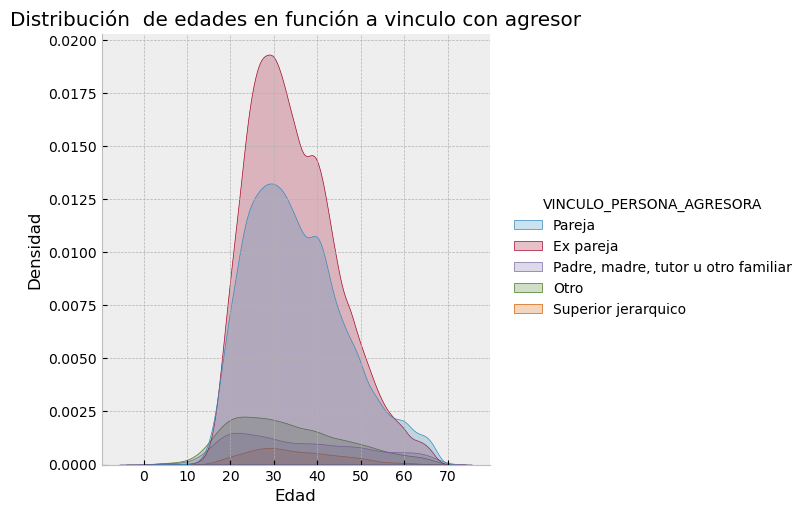

In [7]:
plt.figure()
# Figure -level
ax = sns.displot(data=bd, x='EDAD', kind='kde', hue='VINCULO_PERSONA_AGRESORA', fill=True)
ax.set(xlabel='Edad', ylabel='Densidad', title='Distribución  de edades en función a vinculo con agresor')

Para facilitar el análisis, realizamos la distribuciones de las edades en funcion al vinculos con el agresor en las dos zonas regionales de mayor cantidad de casos y en la de menos. Para determinar si cumplen o no con el patron.

LA CANTIDAD DE CASOS EN CADA REGIÓN SON:


Text(0.5, 0, 'Regiones')

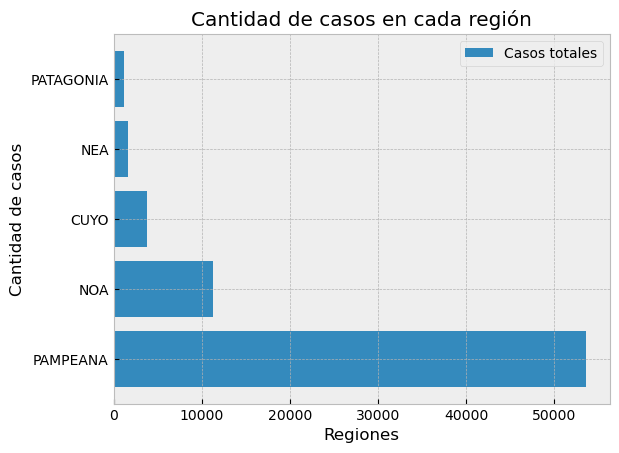

In [8]:
# REALIZAMOS UNA COPIA DE LA COLUMNA PROVINCIA PARA PRESERVAR LOS DATOS ORIGNALES.
bd['REGION'] = bd['PROVINCIA']

# EN LA NUEVA COLUMNA ASIGNAMOS UNA NUEVA CATEGORIA
PAMPEANA = ['Ciudad Autónoma de Buenos Aires', 'Buenos Aires', 'Córdoba', 'Entre Ríos', 'La Pampa','Santa Fe']
NOA = ['Catamarca', 'Jujuy', 'La Rioja', 'Salta', 'Santiago del Estero', 'Santiago Del Estero', 'Tucumán']
NEA = ['Corrientes', 'Chaco', 'Formosa', 'Misiones'] 
CUYO = ['Mendoza', 'San Luis', 'San Juan']
PATAGONIA = ['Chubut', 'Neuquén', 'Río Negro', 'Santa Cruz', 'Tierra del Fuego, Antártida e Islas del Atlántico Sur']

bd['REGION'] = bd['REGION'].apply(lambda x:"PAMPEANA" if x in PAMPEANA else x)
bd['REGION'] = bd['REGION'].apply(lambda x:"NOA" if x in NOA else x)
bd['REGION'] = bd['REGION'].apply(lambda x:"NEA" if x in NEA else x)
bd['REGION'] = bd['REGION'].apply(lambda x:"CUYO" if x in CUYO else x)
bd['REGION'] = bd['REGION'].apply(lambda x:"PATAGONIA" if x in PATAGONIA else x)

print('LA CANTIDAD DE CASOS EN CADA REGIÓN SON:')
# CREAMOS UNA SERIE DE LAS REGIONAS CONTANDO LOS CASOS
serie_regiones=bd.REGION.value_counts()
fig, ax= plt.subplots()
ax.barh(serie_regiones.index, serie_regiones, label='Casos totales')
ax.legend(loc='upper right')
ax.set_title('Cantidad de casos en cada región')
ax.set_ylabel('Cantidad de casos')
ax.set_xlabel('Regiones')

#### PARA LA REGIÓN CON LA MAYOR CANTIDAD DE CASOS: LA REGIÓN PAMPEANA

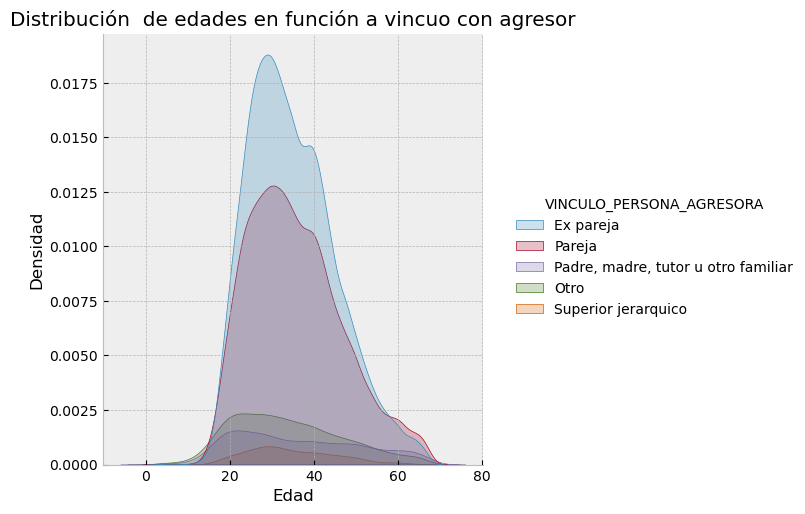

In [9]:
casos_regionpampeana= bd.loc[bd['REGION']=='PAMPEANA'] 

ax = sns.displot(data=casos_regionpampeana, x='EDAD', kind='kde', hue='VINCULO_PERSONA_AGRESORA', fill=True)
ax.set(xlabel='Edad', ylabel='Densidad', title='Distribución  de edades en función a vincuo con agresor')

#### PARA LA REGION CON LA SEGUNDA MAYOR CANTIDAD DE CASOS: LA REGION NOA

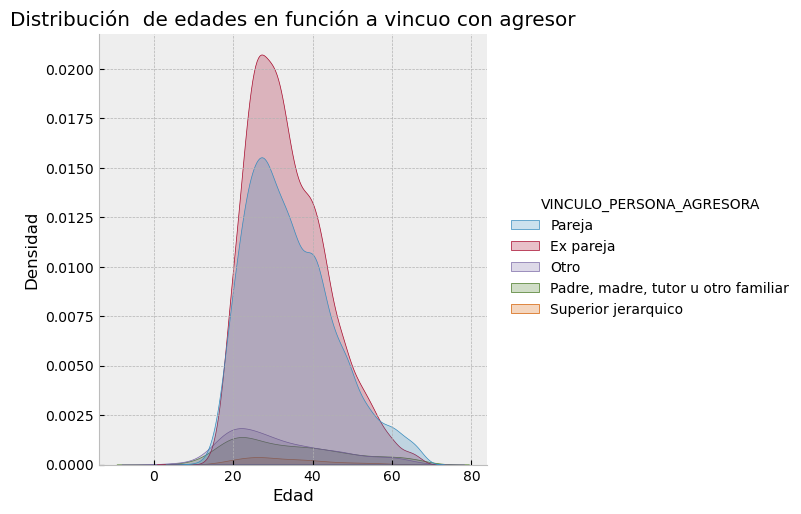

In [10]:
casos_regionnoa= bd.loc[bd['REGION']=='NOA'] 
ax = sns.displot(data=casos_regionnoa, x='EDAD', kind='kde', hue='VINCULO_PERSONA_AGRESORA', fill=True)
ax.set(xlabel='Edad', ylabel='Densidad', title='Distribución  de edades en función a vincuo con agresor')

#### PARA LA REGION CON LA MENOR CANTIDAD DE CASOS? LA REGION PATAGONICA

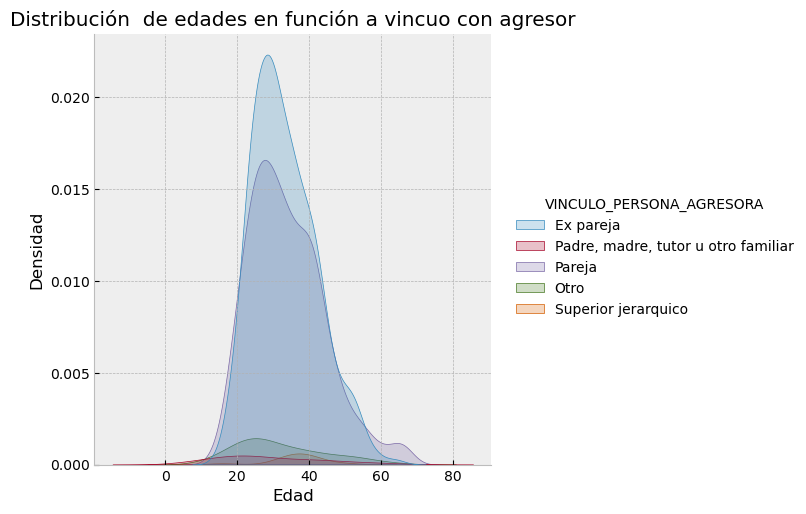

In [11]:
casos_regionpatagonia= bd.loc[bd['REGION']=='PATAGONIA'] 
ax = sns.displot(data=casos_regionpatagonia, x='EDAD', kind='kde', hue='VINCULO_PERSONA_AGRESORA', fill=True)
ax.set(xlabel='Edad', ylabel='Densidad', title='Distribución  de edades en función a vincuo con agresor')

Podemos identrificar que para todos los casos, aquellos agresores que forman parte del círculo familiar se dan entre los 8 a 16 años de edad. Pero, los principales agresores son la pareja o ex-pareja. En especial, entre los 18 a 42 años.

### 4.6. POR OTRA PARTE PODEMOS IDENTIFICAR LOS MOTIVOS DE VIOLENCIA
#### 4.6.1. PARA LOS CASOS QUE INVOLUCRAN MENORES DE EDAD

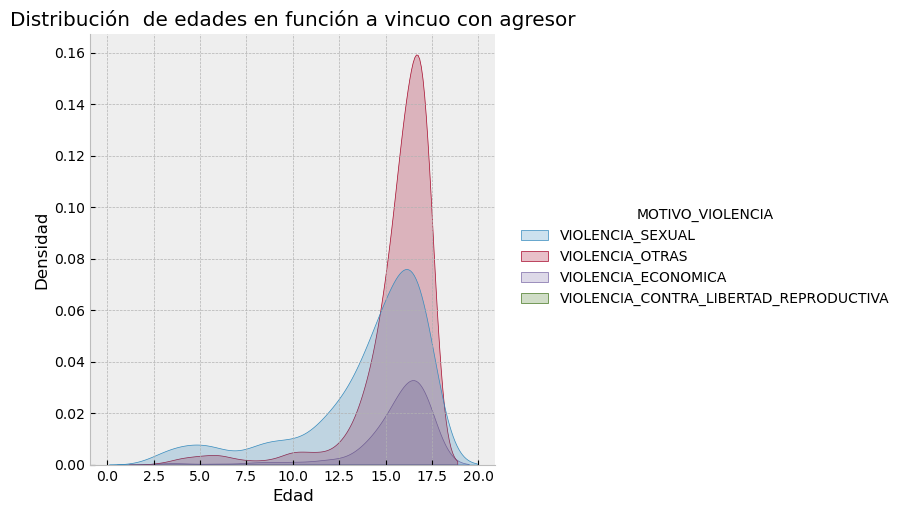

In [12]:
casos_menores= bd.loc[bd['EDAD']<18] 
ax = sns.displot(data=casos_menores, x='EDAD', kind='kde', hue='MOTIVO_VIOLENCIA', fill=True)
ax.set(xlabel='Edad', ylabel='Densidad', title='Distribución  de edades en función a vincuo con agresor')

#### 4.6.2. PARA LOS CASOS DE MAYORES DE 18 AÑOS

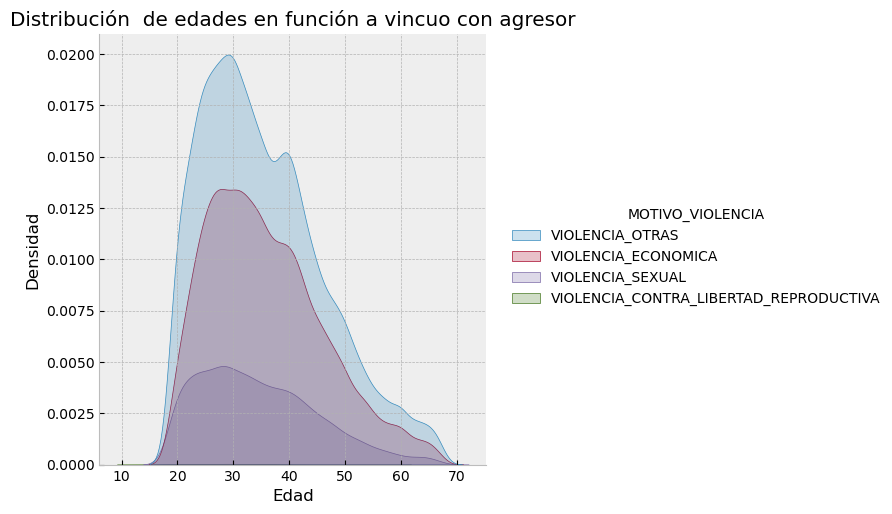

In [13]:
casos_mayores= bd.loc[bd['EDAD']>18] 
ax = sns.displot(data=casos_mayores, x='EDAD', kind='kde', hue='MOTIVO_VIOLENCIA', fill=True)
ax.set(xlabel='Edad', ylabel='Densidad', title='Distribución  de edades en función a vincuo con agresor')

Por lo que, podemos llegar a determinar que para los casos que implican a menores de edad, el motivo principal es abuso sexual. Mientras que, a partir de los 18, el motivo predominante es violencia económica.

### 4.7. POR ULTIMO, PODEMOS ANALIZAR LOS TIPOS DE VIOLENCIA EN FUNCION A LA EDAD

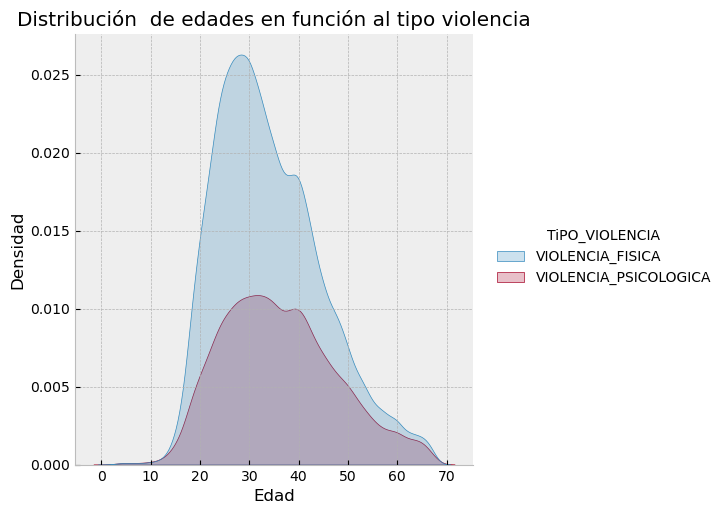

In [14]:
#ANALIZAMOS TIPO VIOLENCIA-EDAD EN CADA ZONA
ax = sns.displot(data=bd, x='EDAD', kind='kde', hue='TiPO_VIOLENCIA', fill=True)
ax.set(xlabel='Edad', ylabel='Densidad', title='Distribución  de edades en función al tipo violencia')

Siendo la violencia predominante, para todas las edades, la violencia física.

## Sección 5 - Conclusiones de los datos
- la mayor cantidad de casos se da en los meses de Marzo, Junio, Julio y Agosto, es decir, en invierno. Esto puede deberse a que como la mayoria de los casos se da por pareja, al encontrarrse mas tiempo en el hogar debido al frío, hay una mayor posibilidad de que suceda un caso de viiolencia.
- la mayor cantidad de casos se da en casos con victimas de un rango de edad de entre 27-43 años, siendo la edad en la que se concentra el 50% de los casos a los 34 años
- la provincia con mayor cantidad de casos es Buenos Aires, mientras que la de menor cantidad es La Pampa
- Las víctimas cuyo agresor es un familiar (madre, padre, tutor o otro familiar) se encuentran entre los 11 y 20 años. Mientras que, aquellas en las que el agresor es la pareja o ex pareja son de entre 18 a 45 años.
- el tipo de violencia que más se ejerce es la física.
- para los casos que involucran menores, se genera una mayor violencia sexual mientra que, a partir de los 18 años, hay una mayor violencia econonómica.

## Sección 6 - Recomendaciones
- tanto en las provincias de Buenos Aires, Santa Fe, Tucumán, Mendoza y Ciudad de Buenos Aires incrementar la cantidad de centros de ayuda para la mujer
- debido a que la media de casos en la región del NOA y NEA son las regiones con una mayor cantidad de casos en menores, se recomienda la creación de talleres en colegios, para fomentar la comunicación de los alumnos con el cuerpo de profesores cuando exista algún caso de violencia
- aumentar la cantidad de talleres para mujeres en los meses de invierno para evitar que se encuentren más tiempo en casa y, por lo tanto, prevenir la violencia en los hogares.
- fomentar la educación en provincias y países con menos recursos
- crear cursos de capacitación de varios oficios para las mujeres, para generar sus propios ingresos y asi, evotar la violencia econónica que generan sus parejas.

## Sección 7 - Aplicación de Modelos de ML
Luego del análisis del dataset, su limpieza y filtrado, y entender a mayor profundidad la relación entre algunas variables, implementaremos las técnicas vistas en clase para generar un modelo que nos ayude a predecir futuros casos de violencia de género. Ese modelo será puesto a prueba usando en principio un grupo de test del mismo dataset, y si obtenermos resultados con un buen accuracy, podriamos implementarlo a futuro con otro dataset, por ejemplo, de otros países. 

### 7.1. Arbol de decisión
#### 7.1.1 Análisis de la profundidas del árbol y Accurancy

In [15]:
bd.head()

,FECHA,PROVINCIA,GENERO_PERSONA_SIT_VIOLENCIA,EDAD,PAIS_NACIMIENTO,VIOLENCIA_FISICA,VIOLENCIA_PSICOLOGICA,VIOLENCIA_SEXUAL,VIOLENCIA_ECONOMICA,VIOLENCIA_SIMBOLICA,...,VINCULO_PERSONA_AGRESORA,GENERO_AGRESOR,CASO,TiPO_VIOLENCIA,LUGAR_VIOLENCIA,MOTIVO_VIOLENCIA,TIPOVIOLENCIA,FECHA_MES,MES,REGION
0,2020-01-01,Tucumán,Mujer,39.0,NaN,1,1,0,0,0,...,Pareja,Varon,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,1,2020-01,1,NOA
1,2020-01-01,Buenos Aires,Mujer,39.0,NaN,1,1,0,0,0,...,Ex pareja,Varon,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,1,2020-01,1,PAMPEANA
2,2020-01-01,Buenos Aires,Mujer,22.0,Argentina,1,1,0,0,0,...,Ex pareja,Varon,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,1,2020-01,1,PAMPEANA
3,2020-01-01,Buenos Aires,Mujer,53.0,NaN,0,1,0,0,0,...,Pareja,Varon,1,VIOLENCIA_PSICOLOGICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,0,2020-01,1,PAMPEANA
4,2020-01-01,Buenos Aires,Mujer,38.0,Argentina,1,1,0,0,0,...,Pareja,Varon,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,1,2020-01,1,PAMPEANA


In [16]:
# Paso 2: Dividir los datos en características (X) y variable objetivo (y)
X=bd.drop(['FECHA', 'FECHA_MES', 'MES','PROVINCIA', 'GENERO_PERSONA_SIT_VIOLENCIA', 'PAIS_NACIMIENTO', 
           'VIOLENCIA_FISICA', 'VIOLENCIA_PSICOLOGICA', 'TIPOVIOLENCIA',
       'VIOLENCIA_SEXUAL', 'VIOLENCIA_ECONOMICA', 'VIOLENCIA_SIMBOLICA',
       'VIOLENCIA_DOMESTICA', 'VIOLENCIA_INSTITUCIONAL', 'VIOLENCIA_LABORAL',
       'VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA', 'VIOLENCIA_OTRAS',
       'VINCULO_PERSONA_AGRESORA', 'GENERO_AGRESOR', 'CASO', 'TiPO_VIOLENCIA'], axis=1)
y=bd['TiPO_VIOLENCIA']
X.head(10)

,EDAD,LUGAR_VIOLENCIA,MOTIVO_VIOLENCIA,REGION
0,39.0,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,NOA
1,39.0,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,PAMPEANA
2,22.0,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,PAMPEANA
3,53.0,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,PAMPEANA
4,38.0,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,PAMPEANA
5,23.0,VIOLENCIA_DOMESTICA,VIOLENCIA_ECONOMICA,PAMPEANA
6,25.0,VIOLENCIA_DOMESTICA,VIOLENCIA_ECONOMICA,NOA
7,24.0,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,PAMPEANA
8,21.0,VIOLENCIA_DOMESTICA,VIOLENCIA_ECONOMICA,PAMPEANA
9,21.0,VIOLENCIA_DOMESTICA,VIOLENCIA_ECONOMICA,CUYO


In [17]:
# REALIZAMOS UNA COPIA DE LA COLUMNA PROVINCIA PARA PRESERVAR LOS DATOS ORIGNALES.
bd['TIPO_VIOLENCIA_NUM'] = bd['TiPO_VIOLENCIA']

bd['TIPO_VIOLENCIA_NUM'] = bd['TIPO_VIOLENCIA_NUM'].replace('VIOLENCIA_FISICA', '0')
bd['TIPO_VIOLENCIA_NUM'] = bd['TIPO_VIOLENCIA_NUM'].replace('VIOLENCIA_PSICOLOGICA', '1')

bd.head(5)

,FECHA,PROVINCIA,GENERO_PERSONA_SIT_VIOLENCIA,EDAD,PAIS_NACIMIENTO,VIOLENCIA_FISICA,VIOLENCIA_PSICOLOGICA,VIOLENCIA_SEXUAL,VIOLENCIA_ECONOMICA,VIOLENCIA_SIMBOLICA,...,GENERO_AGRESOR,CASO,TiPO_VIOLENCIA,LUGAR_VIOLENCIA,MOTIVO_VIOLENCIA,TIPOVIOLENCIA,FECHA_MES,MES,REGION,TIPO_VIOLENCIA_NUM
0,2020-01-01,Tucumán,Mujer,39.0,NaN,1,1,0,0,0,...,Varon,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,1,2020-01,1,NOA,0
1,2020-01-01,Buenos Aires,Mujer,39.0,NaN,1,1,0,0,0,...,Varon,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,1,2020-01,1,PAMPEANA,0
2,2020-01-01,Buenos Aires,Mujer,22.0,Argentina,1,1,0,0,0,...,Varon,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,1,2020-01,1,PAMPEANA,0
3,2020-01-01,Buenos Aires,Mujer,53.0,NaN,0,1,0,0,0,...,Varon,1,VIOLENCIA_PSICOLOGICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,0,2020-01,1,PAMPEANA,1
4,2020-01-01,Buenos Aires,Mujer,38.0,Argentina,1,1,0,0,0,...,Varon,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,1,2020-01,1,PAMPEANA,0


In [18]:
# REALIZAMOS UNA COPIA DE LA COLUMNA PROVINCIA PARA PRESERVAR LOS DATOS ORIGNALES.
bd['PROVINCIA_NUM'] = bd['PROVINCIA']

bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Ciudad Autónoma de Buenos Aires', '0')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Buenos Aires', '1')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Córdoba', '2')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Entre Ríos', '3')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('La Pampa', '4')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Santa Fe', '5')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Catamarca', '6')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Jujuy', '7')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('La Rioja', '8')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Salta', '9')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Santiago del Estero', '10')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Tucumán', '11')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Misiones', '12')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Chaco', '13')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Formosa', '14')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Corrientes', '15')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Mendoza', '16')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('San Luis', '17')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('San Juan', '18')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Chubut', '19')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Neuquén', '20')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Río Negro', '21')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Santa Cruz', '22')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Tierra del Fuego, Antártida e Islas del Atlántico Sur', '23')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Santiago Del Estero', '10')
bd.head(5)

,FECHA,PROVINCIA,GENERO_PERSONA_SIT_VIOLENCIA,EDAD,PAIS_NACIMIENTO,VIOLENCIA_FISICA,VIOLENCIA_PSICOLOGICA,VIOLENCIA_SEXUAL,VIOLENCIA_ECONOMICA,VIOLENCIA_SIMBOLICA,...,CASO,TiPO_VIOLENCIA,LUGAR_VIOLENCIA,MOTIVO_VIOLENCIA,TIPOVIOLENCIA,FECHA_MES,MES,REGION,TIPO_VIOLENCIA_NUM,PROVINCIA_NUM
0,2020-01-01,Tucumán,Mujer,39.0,NaN,1,1,0,0,0,...,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,1,2020-01,1,NOA,0,11
1,2020-01-01,Buenos Aires,Mujer,39.0,NaN,1,1,0,0,0,...,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,1,2020-01,1,PAMPEANA,0,1
2,2020-01-01,Buenos Aires,Mujer,22.0,Argentina,1,1,0,0,0,...,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,1,2020-01,1,PAMPEANA,0,1
3,2020-01-01,Buenos Aires,Mujer,53.0,NaN,0,1,0,0,0,...,1,VIOLENCIA_PSICOLOGICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,0,2020-01,1,PAMPEANA,1,1
4,2020-01-01,Buenos Aires,Mujer,38.0,Argentina,1,1,0,0,0,...,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,1,2020-01,1,PAMPEANA,0,1


In [19]:
# REALIZAMOS UNA COPIA DE LA COLUMNA PROVINCIA PARA PRESERVAR LOS DATOS ORIGNALES.
bd['VINCULO_PERSONA_AGRESORA_NUM'] = bd['VINCULO_PERSONA_AGRESORA']

bd['VINCULO_PERSONA_AGRESORA_NUM'] = bd['VINCULO_PERSONA_AGRESORA_NUM'].replace('Pareja', '0')
bd['VINCULO_PERSONA_AGRESORA_NUM'] = bd['VINCULO_PERSONA_AGRESORA_NUM'].replace('Ex pareja', '1')
bd['VINCULO_PERSONA_AGRESORA_NUM'] = bd['VINCULO_PERSONA_AGRESORA_NUM'].replace('Padre, madre, tutor u otro familiar', '2')
bd['VINCULO_PERSONA_AGRESORA_NUM'] = bd['VINCULO_PERSONA_AGRESORA_NUM'].replace('Superior jerarquico', '3')
bd['VINCULO_PERSONA_AGRESORA_NUM'] = bd['VINCULO_PERSONA_AGRESORA_NUM'].replace('Otro', '4')

bd.head(5)

,FECHA,PROVINCIA,GENERO_PERSONA_SIT_VIOLENCIA,EDAD,PAIS_NACIMIENTO,VIOLENCIA_FISICA,VIOLENCIA_PSICOLOGICA,VIOLENCIA_SEXUAL,VIOLENCIA_ECONOMICA,VIOLENCIA_SIMBOLICA,...,TiPO_VIOLENCIA,LUGAR_VIOLENCIA,MOTIVO_VIOLENCIA,TIPOVIOLENCIA,FECHA_MES,MES,REGION,TIPO_VIOLENCIA_NUM,PROVINCIA_NUM,VINCULO_PERSONA_AGRESORA_NUM
0,2020-01-01,Tucumán,Mujer,39.0,NaN,1,1,0,0,0,...,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,1,2020-01,1,NOA,0,11,0
1,2020-01-01,Buenos Aires,Mujer,39.0,NaN,1,1,0,0,0,...,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,1,2020-01,1,PAMPEANA,0,1,1
2,2020-01-01,Buenos Aires,Mujer,22.0,Argentina,1,1,0,0,0,...,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,1,2020-01,1,PAMPEANA,0,1,1
3,2020-01-01,Buenos Aires,Mujer,53.0,NaN,0,1,0,0,0,...,VIOLENCIA_PSICOLOGICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,0,2020-01,1,PAMPEANA,1,1,0
4,2020-01-01,Buenos Aires,Mujer,38.0,Argentina,1,1,0,0,0,...,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,1,2020-01,1,PAMPEANA,0,1,0


In [20]:
# REALIZAMOS UNA COPIA DE LA COLUMNA PROVINCIA PARA PRESERVAR LOS DATOS ORIGNALES.
bd['LUGAR_VIOLENCIA_NUM'] = bd['LUGAR_VIOLENCIA']

bd['LUGAR_VIOLENCIA_NUM'] = bd['LUGAR_VIOLENCIA_NUM'].replace('VIOLENCIA_INSTITUCIONAL', '0')
bd['LUGAR_VIOLENCIA_NUM'] = bd['LUGAR_VIOLENCIA_NUM'].replace('VIOLENCIA_LABORAL', '1')
bd['LUGAR_VIOLENCIA_NUM'] = bd['LUGAR_VIOLENCIA_NUM'].replace('VIOLENCIA_DOMESTICA', '2')

bd.head(5)

,FECHA,PROVINCIA,GENERO_PERSONA_SIT_VIOLENCIA,EDAD,PAIS_NACIMIENTO,VIOLENCIA_FISICA,VIOLENCIA_PSICOLOGICA,VIOLENCIA_SEXUAL,VIOLENCIA_ECONOMICA,VIOLENCIA_SIMBOLICA,...,LUGAR_VIOLENCIA,MOTIVO_VIOLENCIA,TIPOVIOLENCIA,FECHA_MES,MES,REGION,TIPO_VIOLENCIA_NUM,PROVINCIA_NUM,VINCULO_PERSONA_AGRESORA_NUM,LUGAR_VIOLENCIA_NUM
0,2020-01-01,Tucumán,Mujer,39.0,NaN,1,1,0,0,0,...,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,1,2020-01,1,NOA,0,11,0,2
1,2020-01-01,Buenos Aires,Mujer,39.0,NaN,1,1,0,0,0,...,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,1,2020-01,1,PAMPEANA,0,1,1,2
2,2020-01-01,Buenos Aires,Mujer,22.0,Argentina,1,1,0,0,0,...,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,1,2020-01,1,PAMPEANA,0,1,1,2
3,2020-01-01,Buenos Aires,Mujer,53.0,NaN,0,1,0,0,0,...,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,0,2020-01,1,PAMPEANA,1,1,0,2
4,2020-01-01,Buenos Aires,Mujer,38.0,Argentina,1,1,0,0,0,...,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,1,2020-01,1,PAMPEANA,0,1,0,2


In [21]:
# REALIZAMOS UNA COPIA DE LA COLUMNA PROVINCIA PARA PRESERVAR LOS DATOS ORIGNALES.
bd['MOTIVO_VIOLENCIA_NUM'] = bd['MOTIVO_VIOLENCIA']

bd['MOTIVO_VIOLENCIA_NUM'] =bd['MOTIVO_VIOLENCIA_NUM'].replace('VIOLENCIA_OTRAS', '0')
bd['MOTIVO_VIOLENCIA_NUM'] =bd['MOTIVO_VIOLENCIA_NUM'].replace('VIOLENCIA_ECONOMICA', '1')
bd['MOTIVO_VIOLENCIA_NUM'] =bd['MOTIVO_VIOLENCIA_NUM'].replace('VIOLENCIA_SEXUAL', '2')
bd['MOTIVO_VIOLENCIA_NUM'] =bd['MOTIVO_VIOLENCIA_NUM'].replace('VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA', '3')

bd.head(5)

,FECHA,PROVINCIA,GENERO_PERSONA_SIT_VIOLENCIA,EDAD,PAIS_NACIMIENTO,VIOLENCIA_FISICA,VIOLENCIA_PSICOLOGICA,VIOLENCIA_SEXUAL,VIOLENCIA_ECONOMICA,VIOLENCIA_SIMBOLICA,...,MOTIVO_VIOLENCIA,TIPOVIOLENCIA,FECHA_MES,MES,REGION,TIPO_VIOLENCIA_NUM,PROVINCIA_NUM,VINCULO_PERSONA_AGRESORA_NUM,LUGAR_VIOLENCIA_NUM,MOTIVO_VIOLENCIA_NUM
0,2020-01-01,Tucumán,Mujer,39.0,NaN,1,1,0,0,0,...,VIOLENCIA_OTRAS,1,2020-01,1,NOA,0,11,0,2,0
1,2020-01-01,Buenos Aires,Mujer,39.0,NaN,1,1,0,0,0,...,VIOLENCIA_OTRAS,1,2020-01,1,PAMPEANA,0,1,1,2,0
2,2020-01-01,Buenos Aires,Mujer,22.0,Argentina,1,1,0,0,0,...,VIOLENCIA_OTRAS,1,2020-01,1,PAMPEANA,0,1,1,2,0
3,2020-01-01,Buenos Aires,Mujer,53.0,NaN,0,1,0,0,0,...,VIOLENCIA_OTRAS,0,2020-01,1,PAMPEANA,1,1,0,2,0
4,2020-01-01,Buenos Aires,Mujer,38.0,Argentina,1,1,0,0,0,...,VIOLENCIA_OTRAS,1,2020-01,1,PAMPEANA,0,1,0,2,0


In [22]:
# Paso 2: Dividir los datos en características (X) y variable objetivo (y)
X=bd.drop(['FECHA', 'REGION','FECHA_MES', 'MES','PROVINCIA', 'GENERO_PERSONA_SIT_VIOLENCIA', 'PAIS_NACIMIENTO', 
           'VIOLENCIA_FISICA', 'VIOLENCIA_PSICOLOGICA', 'TIPOVIOLENCIA',
       'VIOLENCIA_SEXUAL', 'VIOLENCIA_ECONOMICA', 'VIOLENCIA_SIMBOLICA',
       'VIOLENCIA_DOMESTICA', 'VIOLENCIA_INSTITUCIONAL', 'VIOLENCIA_LABORAL',
       'VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA', 'VIOLENCIA_OTRAS',
       'VINCULO_PERSONA_AGRESORA', 'GENERO_AGRESOR', 'CASO', 'TiPO_VIOLENCIA',
       'LUGAR_VIOLENCIA', 'MOTIVO_VIOLENCIA', 'TIPO_VIOLENCIA_NUM'], axis=1)
y=bd['TIPO_VIOLENCIA_NUM']
X.head(10)

,EDAD,PROVINCIA_NUM,VINCULO_PERSONA_AGRESORA_NUM,LUGAR_VIOLENCIA_NUM,MOTIVO_VIOLENCIA_NUM
0,39.0,11,0,2,0
1,39.0,1,1,2,0
2,22.0,1,1,2,0
3,53.0,1,0,2,0
4,38.0,1,0,2,0
5,23.0,1,1,2,1
6,25.0,10,0,2,1
7,24.0,5,1,2,0
8,21.0,5,0,2,1
9,21.0,18,0,2,1


In [23]:
# Paso 3: Convertir variables categóricas en variables dummy (one-hot encoding)
#X = pd.get_dummies(X)

A_train = []
A_test = []
for i in range(0,25):
    
    if i == 0:
        i = None
    
    # Separamos el dataset, creamos y ejecutamos el modelo
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) #Me quedo con 30% para test y 70% para train
    arbol_de_decision = DecisionTreeClassifier(max_depth=i, random_state = 11) #Creamos el modelo
    arbol_de_decision.fit(X_train,y_train) #Entrenamos el modelo
    y_train_pred = arbol_de_decision.predict(X_train) #Prediccion en Train
    y_test_pred = arbol_de_decision.predict(X_test) #Prediccion en Test
    train_accuracy = accuracy_score(y_train, y_train_pred) #Calculo el accuracy en Train
    test_accuracy = accuracy_score(y_test, y_test_pred) #Calculo el accuracy en Test
    
    # Acumulo los resultados de Accuracy para cada corrida:
    
    A_train.append(train_accuracy)
    A_test.append(test_accuracy)

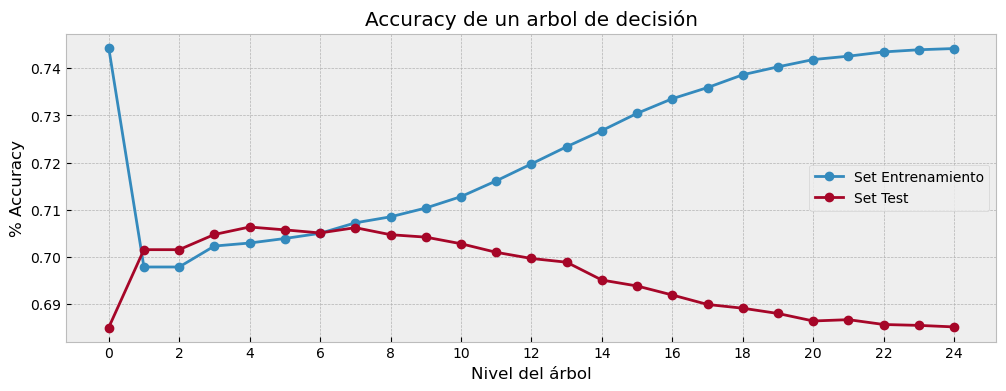

In [24]:
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(A_train,marker='o', label='Set Entrenamiento')
ax.plot(A_test,marker='o', label='Set Test', color='C1')

ax.set_xlabel('Nivel del árbol')
ax.set_xticks(range(0,26,2))
ax.set_ylabel('% Accuracy')
#ax.set_ylim(0, 1.1)
ax.set_title('Accuracy de un arbol de decisión')
ax.legend()

**OBS:** En este gráfico podemos observar como varía el accuracy en función de la profundidad que le damos al arbol. Se observa que una profundidad de 6 es un valor razonable, antes de empezar a perder accuracy en el set de test y posiblemente empezar a overfitear el set de entrenamiento.

**Arbol de decisión (depth=6)**

In [25]:
#Creamos el modelo
tree = DecisionTreeClassifier(max_depth=6, random_state=42)
 
#Entrenamos el modelo
tree.fit(X_train, y_train) 
#Prediccion en Train
y_train_pred = tree.predict(X_train) 
#Prediccion en Test
y_test_pred = tree.predict(X_test) 
 



#### 7.1.2. Métricas
#### 1.1. Accuracy

In [26]:
#Calculo el accuracy en Train
train_accuracy_1 = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy_1 = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', round(train_accuracy_1,3))
print('% de aciertos sobre el set de evaluación:',round(test_accuracy_1,3))

% de aciertos sobre el set de entrenamiento: 0.705
% de aciertos sobre el set de evaluación: 0.705


#### 2.2. Matriz de confusión

In [27]:
confusion_matrix(y_test, y_test_pred) 

array([[13836,   635],
       [ 5691,  1288]], dtype=int64)

#### 2.3. Precision

In [28]:
precision_1 = round(precision_score(y_test, y_test_pred, pos_label='1'),5)
precision_1

0.66979

#### 2.4. Recall

In [29]:
recall_1 = round(recall_score(y_test, y_test_pred, pos_label='1'),5)
recall_1

0.18455

In [30]:
d1 = {'ArbolDecison':[test_accuracy_1,precision_1,recall_1]}
d1

{'ArbolDecison': [0.705081585081585, 0.66979, 0.18455]}

### 7.2. Random Forest
#### 7.2.1. Análisis del Accuracy en profundidad y numero de estimadores
##### 7.2.1.1. Cantidad de estimadores

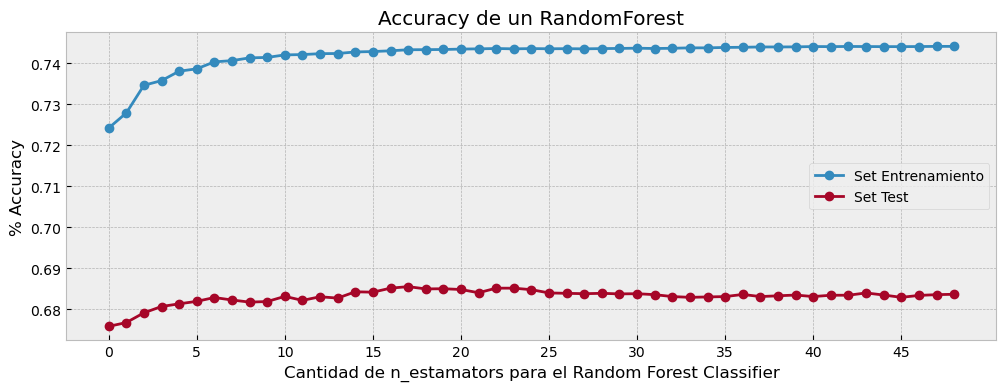

In [31]:
A_train = []
A_test = []

for i in range(1,50):
    
    #Creamos el modelo
    random_forest_model = RandomForestClassifier(n_estimators = i, random_state = 42) 
    #Entrenamos el modelo
    random_forest_model.fit(X_train,y_train) 
    #Prediccion en Train y Test
    y_train_pred = random_forest_model.predict(X_train)
    y_test_pred = random_forest_model.predict(X_test) 
    #Calculo el accuracy en Train y Test
    train_accuracy = accuracy_score(y_train, y_train_pred) 
    test_accuracy = accuracy_score(y_test, y_test_pred) 
    
    # Acumulo los resultados de Accuracy para cada corrida:
    
    A_train.append(train_accuracy)
    A_test.append(test_accuracy)
    
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(A_train,marker='o', label='Set Entrenamiento')
ax.plot(A_test,marker='o', label='Set Test', color='C1')

ax.set_xlabel('Cantidad de n_estamators para el Random Forest Classifier')
ax.set_xticks(range(0,50,5))
ax.set_ylabel('% Accuracy')
#ax.set_ylim(0, 1.1)
ax.set_title('Accuracy de un RandomForest')
ax.legend()

**OBS:** Podemos observar que una vez superados los 10 arboles en el bosque, no mejora el accuracy y se producirá un overfitting en el set de entrenamiento.

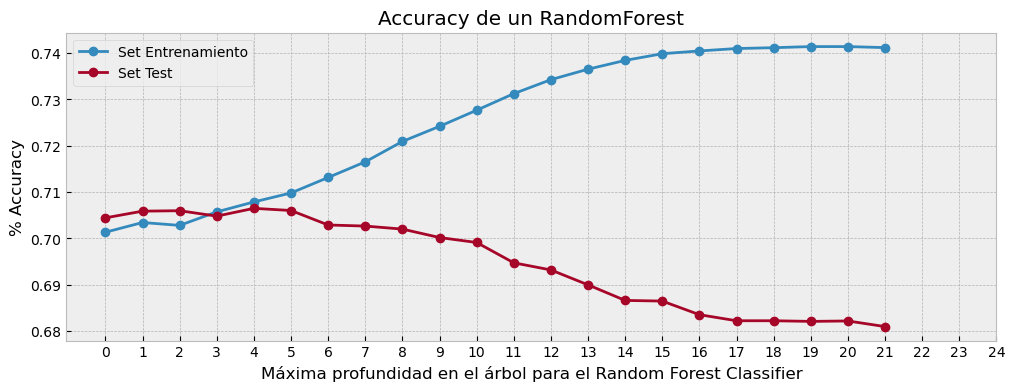

In [32]:
A_train = []
A_test = []

for i in range(3,25):
    
    #Creamos el modelo
    random_forest_model = RandomForestClassifier(n_estimators = 10, max_depth = i, random_state = 42) 
    #Entrenamos el modelo
    random_forest_model.fit(X_train,y_train) 
    #Prediccion en Train y Test
    y_train_pred = random_forest_model.predict(X_train) 
    y_test_pred = random_forest_model.predict(X_test) 
    #Calculo el accuracy en Train y Test
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred) 
    
    # Acumulo los resultados de Accuracy para cada corrida:
    
    A_train.append(train_accuracy)
    A_test.append(test_accuracy)
    
fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(A_train,marker='o', label='Set Entrenamiento')
ax.plot(A_test,marker='o', label='Set Test', color='C1')

ax.set_xlabel('Máxima profundidad en el árbol para el Random Forest Classifier')
ax.set_xticks(range(0,25,1))
ax.set_ylabel('% Accuracy')

#ax.set_ylim(0, 1.1)
ax.set_title('Accuracy de un RandomForest')
ax.legend()

Consideramos que un buen resultado se obtendrá con 10 estimaciones y una profundidad de 4.

##### 7.2.2. Aplicamos Random Forest (n_estimators=10, max_depth=4)

In [33]:
# Creo un objeto Random Forest 
random_forest_model = RandomForestClassifier(n_estimators=10,
                                             max_depth =4, 
                                             random_state=42,
                                             max_features="log2")

# Fiteo el modelo
random_forest_model.fit(X_train, y_train) 

# Realizo la predicción de los modelos en Train y Test
y_train_pred_random_forest_model = random_forest_model.predict(X_train) 
y_test_pred_random_forest_model = random_forest_model.predict(X_test)

##### 7.2.3. Métricas
###### 7.2.3.1. Accuracy

In [34]:
#Calculo el accuracy en Train
train_accuracy_2 = accuracy_score(y_train, y_train_pred_random_forest_model)

#Calculo el accuracy en Test
test_accuracy_2 = accuracy_score(y_test, y_test_pred_random_forest_model)

print('% de aciertos sobre el set de entrenamiento:', round(train_accuracy_2,3))
print('% de aciertos sobre el set de evaluación:',round(test_accuracy_2,3))

% de aciertos sobre el set de entrenamiento: 0.703
% de aciertos sobre el set de evaluación: 0.706


###### 7.2.3.2. Matriz de confusión

In [35]:
confusion_matrix(y_test, y_test_pred_random_forest_model) 

array([[13763,   708],
       [ 5601,  1378]], dtype=int64)

###### 7.2.3.3. Precision

In [36]:
precision_2 = round(precision_score(y_test, y_test_pred_random_forest_model, pos_label='1'),5)
precision_2

0.66059

###### 7.2.3.4. Recall

In [37]:
recall_2 = round(recall_score(y_test, y_test_pred_random_forest_model, pos_label='1'),5)
recall_2

0.19745

In [38]:
d2 = {'RandomForest':[test_accuracy_2,precision_2,recall_2]}
d2

{'RandomForest': [0.7058741258741259, 0.66059, 0.19745]}

#### 7.3. XGBOOST
##### 7.3.1. Aplicación del modelo

In [64]:
#VOLVEMOS A NUESTRA BASE DE DATOS INICIAL
bd=pd.read_excel(r'C:\Users\garro\OneDrive\Escritorio\DATA SCIENCE\TRABAJO PRACTICO\ViolenciaGenero2.3.xlsx', sheet_name='casos')

#CAMBIAMOS FORMATO DE LA COLUMNA FECHA A 'DATETIME'
bd['FECHA']=pd.to_datetime(bd.FECHA, errors='coerce')

#LIMPIEZA DE VALORES NULOS. REEMPLAZO POR MEDIA
bd['EDAD']= bd['EDAD'].fillna(method='bfill')

#REMOCION DE OUTLIERS
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df.loc[(df[column_name]>=lower_bound) & (df[column_name] <= upper_bound)]
    return df
bd = remove_outliers(bd, 'EDAD')

# Paso 2: Dividir los datos en características (X) y variable objetivo (y)
X=bd.drop(['FECHA','VIOLENCIA_FISICA', 'VIOLENCIA_PSICOLOGICA', 'PROVINCIA','LUGAR_VIOLENCIA',
       'VIOLENCIA_SEXUAL', 'VIOLENCIA_ECONOMICA', 'VIOLENCIA_SIMBOLICA', 'EDAD',
       'VIOLENCIA_DOMESTICA', 'VIOLENCIA_INSTITUCIONAL', 'VIOLENCIA_LABORAL',
       'VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA', 'TIPOVIOLENCIA','TiPO_VIOLENCIA', 'VIOLENCIA_OTRAS','GENERO_PERSONA_SIT_VIOLENCIA', 'PAIS_NACIMIENTO', 'GENERO_AGRESOR', 'CASO'], axis=1)
y=bd['TIPOVIOLENCIA']


# Extract text features
cats = X.select_dtypes(exclude=np.number).columns.tolist()

# Convert to Pandas category
for col in cats:
   X[col] = X[col].astype('category')

# Paso 2: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [65]:
# Paso 3: Configurar los parámetros del modelo
params = {
    'objective': 'binary:logistic',  # Función objetivo para la clasificación binaria
    'eval_metric': 'logloss',  # Métrica de evaluación
    'eta': 0.1,  # Tasa de aprendizaje
    'max_depth': 3,  # Profundidad máxima de los árboles
    'subsample': 0.8,  # Proporción de muestras utilizadas en cada árbol
    'colsample_bytree': 0.8  # Proporción de características utilizadas en cada árbol
}

In [66]:
# Paso 4: Entrenar el modelo
#dtrain = xgb.DMatrix(X_train, label=y_train)  # Convertir los datos a una matriz especializada para XGBoost
dtrain = xgb.DMatrix(X_train, y_train, enable_categorical=True)
model = xgb.train(params, dtrain, num_boost_round=100)


In [67]:
# Paso 5: Realizar predicciones en el conjunto de prueba
dtest = xgb.DMatrix(X_test, enable_categorical=True)
y_pred = model.predict(dtest)
y_pred_binary = [round(value) for value in y_pred]  # Convertir las probabilidades en etiquetas binarias


##### 7.3.2. Metricas
###### 7.3.2.1. Accuracy

In [44]:
test_accuracy_3 = accuracy_score(y_test, y_pred_binary)
print("Precisión del modelo: %.2f%%" % (test_accuracy_3 * 100.0))

Precisión del modelo: 70.44%


###### 7.3.2.2. Matriz de confusión

In [45]:
confusion_matrix(y_test, y_pred_binary) 

array([[ 861, 3769],
       [ 458, 9212]], dtype=int64)

###### 7.3.2.3. Precisión

In [71]:
precision_3 = precision_score(y_test, y_pred_binary)
precision_3

0.7096525691395116

###### 7.3.2.4. Recall

In [72]:
recall_3 = recall_score(y_test, y_pred_binary) 
#recall_3 = round(recall_score(y_test, y_pred_binary))
recall_3

0.9526370217166494

In [48]:
d3 = {'XGBoost':[test_accuracy_3,precision_3,recall_3]}
d3

{'XGBoost': [0.7044055944055944, 0.9526370217166494, 1]}

## Sección 8 - Optimización: Grind Search

In [49]:
# Vuelvo a tomar los datos del dataset original y elimino de mi dataset la variable a predecir
#VOLVEMOS A NUESTRA BASE DE DATOS INICIAL
bd=pd.read_excel(r'C:\Users\garro\OneDrive\Escritorio\DATA SCIENCE\TRABAJO PRACTICO\ViolenciaGenero2.3.xlsx', sheet_name='casos')

#CAMBIAMOS FORMATO DE LA COLUMNA FECHA A 'DATETIME'
bd['FECHA']=pd.to_datetime(bd.FECHA, errors='coerce')

#LIMPIEZA DE VALORES NULOS. REEMPLAZO POR MEDIA
bd['EDAD']= bd['EDAD'].fillna(method='bfill')

#REMOCION DE OUTLIERS
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df = df.loc[(df[column_name]>=lower_bound) & (df[column_name] <= upper_bound)]
    return df
bd = remove_outliers(bd, 'EDAD')




In [50]:
# REALIZAMOS UNA COPIA DE LA COLUMNA PROVINCIA PARA PRESERVAR LOS DATOS ORIGNALES.
bd['MOTIVO_VIOLENCIA_NUM'] = bd['MOTIVO_VIOLENCIA']

bd['MOTIVO_VIOLENCIA_NUM'] =bd['MOTIVO_VIOLENCIA_NUM'].replace('VIOLENCIA_OTRAS', '0')
bd['MOTIVO_VIOLENCIA_NUM'] =bd['MOTIVO_VIOLENCIA_NUM'].replace('VIOLENCIA_ECONOMICA', '1')
bd['MOTIVO_VIOLENCIA_NUM'] =bd['MOTIVO_VIOLENCIA_NUM'].replace('VIOLENCIA_SEXUAL', '2')
bd['MOTIVO_VIOLENCIA_NUM'] =bd['MOTIVO_VIOLENCIA_NUM'].replace('VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA', '3')

# REALIZAMOS UNA COPIA DE LA COLUMNA PROVINCIA PARA PRESERVAR LOS DATOS ORIGNALES.
bd['LUGAR_VIOLENCIA_NUM'] = bd['LUGAR_VIOLENCIA']

bd['LUGAR_VIOLENCIA_NUM'] = bd['LUGAR_VIOLENCIA_NUM'].replace('VIOLENCIA_INSTITUCIONAL', '0')
bd['LUGAR_VIOLENCIA_NUM'] = bd['LUGAR_VIOLENCIA_NUM'].replace('VIOLENCIA_LABORAL', '1')
bd['LUGAR_VIOLENCIA_NUM'] = bd['LUGAR_VIOLENCIA_NUM'].replace('VIOLENCIA_DOMESTICA', '2')

# REALIZAMOS UNA COPIA DE LA COLUMNA PROVINCIA PARA PRESERVAR LOS DATOS ORIGNALES.
bd['VINCULO_PERSONA_AGRESORA_NUM'] = bd['VINCULO_PERSONA_AGRESORA']

bd['VINCULO_PERSONA_AGRESORA_NUM'] = bd['VINCULO_PERSONA_AGRESORA_NUM'].replace('Pareja', '0')
bd['VINCULO_PERSONA_AGRESORA_NUM'] = bd['VINCULO_PERSONA_AGRESORA_NUM'].replace('Ex pareja', '1')
bd['VINCULO_PERSONA_AGRESORA_NUM'] = bd['VINCULO_PERSONA_AGRESORA_NUM'].replace('Padre, madre, tutor u otro familiar', '2')
bd['VINCULO_PERSONA_AGRESORA_NUM'] = bd['VINCULO_PERSONA_AGRESORA_NUM'].replace('Superior jerarquico', '3')
bd['VINCULO_PERSONA_AGRESORA_NUM'] = bd['VINCULO_PERSONA_AGRESORA_NUM'].replace('Otro', '4')

# REALIZAMOS UNA COPIA DE LA COLUMNA PROVINCIA PARA PRESERVAR LOS DATOS ORIGNALES.
bd['PROVINCIA_NUM'] = bd['PROVINCIA']

bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Ciudad Autónoma de Buenos Aires', '0')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Buenos Aires', '1')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Córdoba', '2')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Entre Ríos', '3')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('La Pampa', '4')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Santa Fe', '5')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Catamarca', '6')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Jujuy', '7')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('La Rioja', '8')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Salta', '9')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Santiago del Estero', '10')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Tucumán', '11')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Misiones', '12')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Chaco', '13')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Formosa', '14')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Corrientes', '15')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Mendoza', '16')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('San Luis', '17')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('San Juan', '18')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Chubut', '19')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Neuquén', '20')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Río Negro', '21')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Santa Cruz', '22')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Tierra del Fuego, Antártida e Islas del Atlántico Sur', '23')
bd['PROVINCIA_NUM'] = bd['PROVINCIA_NUM'].replace('Santiago Del Estero', '10')

# REALIZAMOS UNA COPIA DE LA COLUMNA PROVINCIA PARA PRESERVAR LOS DATOS ORIGNALES.
bd['TIPO_VIOLENCIA_NUM'] = bd['TiPO_VIOLENCIA']

bd['TIPO_VIOLENCIA_NUM'] = bd['TIPO_VIOLENCIA_NUM'].replace('VIOLENCIA_FISICA', '0')
bd['TIPO_VIOLENCIA_NUM'] = bd['TIPO_VIOLENCIA_NUM'].replace('VIOLENCIA_PSICOLOGICA', '1')

bd.head(5)

,FECHA,PROVINCIA,GENERO_PERSONA_SIT_VIOLENCIA,EDAD,PAIS_NACIMIENTO,VIOLENCIA_FISICA,VIOLENCIA_PSICOLOGICA,VIOLENCIA_SEXUAL,VIOLENCIA_ECONOMICA,VIOLENCIA_SIMBOLICA,...,CASO,TiPO_VIOLENCIA,LUGAR_VIOLENCIA,MOTIVO_VIOLENCIA,TIPOVIOLENCIA,MOTIVO_VIOLENCIA_NUM,LUGAR_VIOLENCIA_NUM,VINCULO_PERSONA_AGRESORA_NUM,PROVINCIA_NUM,TIPO_VIOLENCIA_NUM
0,2020-01-01,Tucumán,Mujer,39.0,NaN,1,1,0,0,0,...,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,1,0,2,0,11,0
1,2020-01-01,Buenos Aires,Mujer,39.0,NaN,1,1,0,0,0,...,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,1,0,2,1,1,0
2,2020-01-01,Buenos Aires,Mujer,22.0,Argentina,1,1,0,0,0,...,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,1,0,2,1,1,0
3,2020-01-01,Buenos Aires,Mujer,53.0,NaN,0,1,0,0,0,...,1,VIOLENCIA_PSICOLOGICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,0,0,2,0,1,1
4,2020-01-01,Buenos Aires,Mujer,38.0,Argentina,1,1,0,0,0,...,1,VIOLENCIA_FISICA,VIOLENCIA_DOMESTICA,VIOLENCIA_OTRAS,1,0,2,0,1,0


In [51]:
# Paso 2: Dividir los datos en características (X) y variable objetivo (y)
X=bd.drop(['FECHA', 'PROVINCIA', 'GENERO_PERSONA_SIT_VIOLENCIA', 'PAIS_NACIMIENTO', 
           'VIOLENCIA_FISICA', 'VIOLENCIA_PSICOLOGICA', 'TIPOVIOLENCIA',
       'VIOLENCIA_SEXUAL', 'VIOLENCIA_ECONOMICA', 'VIOLENCIA_SIMBOLICA',
       'VIOLENCIA_DOMESTICA', 'VIOLENCIA_INSTITUCIONAL', 'VIOLENCIA_LABORAL',
       'VIOLENCIA_CONTRA_LIBERTAD_REPRODUCTIVA', 'VIOLENCIA_OTRAS',
       'VINCULO_PERSONA_AGRESORA', 'GENERO_AGRESOR', 'CASO', 'TiPO_VIOLENCIA',
       'LUGAR_VIOLENCIA', 'MOTIVO_VIOLENCIA', 'TIPO_VIOLENCIA_NUM'], axis=1).to_numpy()
y=bd['TIPO_VIOLENCIA_NUM'].to_numpy() 



print('X = ', X.shape)
print('y = ', y.shape)


X =  (71498, 5)
y =  (71498,)


In [52]:
# n_splits = numero de folds, shufle hace un reordenamiento de los datos antes de introducirlos 
skf = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

# Vuelvo a tomar los sets train y test
train, test = list(skf.split(X, y))[0]

X_train = X[train]
X_test = X[test]
y_train = y[train]
y_test= y[test]

print('Tamaño de los sets de Test y Train considerando Stratified k-fold Y GridSearch:')
print('')
print('X_train = ', X_train.shape)
print('y_train = ', y_train.shape)
print('X_test = ', X_test.shape)
print('y_test = ', y_test.shape)

Tamaño de los sets de Test y Train considerando Stratified k-fold Y GridSearch:

X_train =  (47665, 5)
y_train =  (47665,)
X_test =  (23833, 5)
y_test =  (23833,)


### 8.1. Arbol de Decisión (el de menor precisión)

In [53]:
#Creamos el modelo
t = DecisionTreeClassifier(random_state = 42)
# Creamos la grilla para el Gridsearch
par = list(np.arange(0.0, 1., step=0.05))
cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Hyperparameters for GridSearch
param_grid = {'max_depth' : list(np.arange(2, 11, step=1)), #np.arange(2,11,1),
              'criterion':['gini', 'entropy'],
              'splitter':['best', 'random'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'ccp_alpha':par
             }

model = GridSearchCV(estimator=t, param_grid = param_grid, 
                     cv=cv, scoring = 'roc_auc') #'accuracy')#,'roc_auc' ])

In [54]:
model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.0, 0.05, 0.1, 0.15000000000000002, 0.2,
                                       0.25, 0.30000000000000004,
                                       0.35000000000000003, 0.4, 0.45, 0.5,
                                       0.55, 0.6000000000000001, 0.65,
                                       0.7000000000000001, 0.75, 0.8,
                                       0.8500000000000001, 0.9,
                                       0.9500000000000001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='roc_auc')

In [55]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores parametros: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'splitter': 'best'}
Mejor Score: 0.6759923507132152



Accuracy:
% de aciertos sobre el set de entrenamiento: 0.701
% de aciertos sobre el set de evaluación: 0.696 

 Matriz de Confusión
[[15130   810]
 [ 6426  1467]]

 Precisión: 0.64427

 Recall:  0.18586

 roc_auc_score for DecisionTree:  0.62293


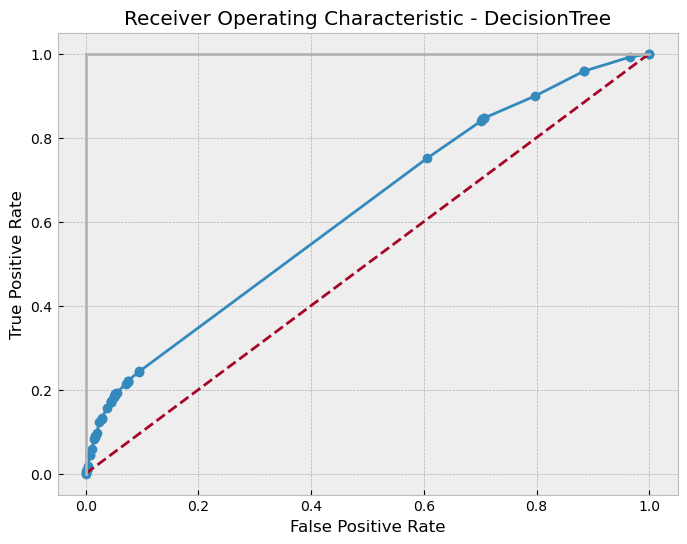

In [57]:
# Vuelvo a calcular el arbol 1, con los mismo parametros pero el nuevo set de datos balanceado
arbol_de_decision = DecisionTreeClassifier(random_state = 42,
                                          criterion = 'entropy',
                                          splitter = 'random',
                                          max_depth = 6, 
                                          max_features ='auto',
                                          ccp_alpha = 0.0 )



arbol_de_decision.fit(X_train,y_train) #Entrenamos el modelo
y_train_pred = arbol_de_decision.predict(X_train) #Prediccion en Train
y_test_pred = arbol_de_decision.predict(X_test) #Prediccion en Test

#Calulos las METRICAS
# ACCURACY
print('Accuracy:')
train_accuracy_4 = accuracy_score(y_train, y_train_pred)
test_accuracy_4= accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de entrenamiento:', round(train_accuracy_4,3))
print('% de aciertos sobre el set de evaluación:',round(test_accuracy_4,3),'\n')

# MATRIZ DE CONFUSION
print(' Matriz de Confusión')
print(confusion_matrix(y_test, y_test_pred) )

# PRECISION
precision_4 = round(precision_score(y_test, y_test_pred, pos_label='1'),5)
print('\n Precisión:', precision_4)

#RECALL
recall_4 = round(recall_score(y_test, y_test_pred, pos_label='1'),5)
print('\n Recall: ', recall_4)

# AREA DE LA CURVA ROC
y_score1 = arbol_de_decision.predict_proba(X_test)[:,1]
# Calculo de tasas 
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1, pos_label='1')
roc_4 = round(roc_auc_score(y_test, y_score1),5)
print('\n roc_auc_score for DecisionTree: ', roc_4)

plt.subplots(1, figsize=(8,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
plt.plot(false_positive_rate1, true_positive_rate1, marker = 'o')
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [58]:
d4 = {'ArbolDecisionOptimizado':[test_accuracy_4,precision_4,recall_4]}
d4

{'ArbolDecisionOptimizado': [0.6963873620610078, 0.64427, 0.18586]}

## Sección 9 - Conclusiones

In [73]:
d = {'ArbolDecison':[test_accuracy_1,precision_1,recall_1],
     'RandomForest':[test_accuracy_2,precision_2,recall_2],
     'XGBoost':[test_accuracy_3,precision_3,recall_3],
     'ArbolDecisionOptimizado':[test_accuracy_4,precision_4,recall_4]}

total = pd.DataFrame(d, index = ['Accuracy','Precision','Recall'])
total

,ArbolDecison,RandomForest,XGBoost,ArbolDecisionOptimizado
Accuracy,0.705082,0.705874,0.704406,0.696387
Precision,0.669790,0.660590,0.709653,0.644270
Recall,0.184550,0.197450,0.952637,0.185860


A partir de este último cuadro comparativo, podemos concluir que el mejor modelo es el XGBoost. 


## Sección 10 - Trabajos a futuro
Debido al gran costo computacional que requiere el recurso Grind Search para la optimización y se hizo imposible utilizarlo para otros modelos de Machine Learning (como en el caso de XGBoost), recomendamos implementar otros recursos de optimización que se ajusen a esta base de datos y que requieran un menor costo computacional. 